In [1]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [2]:
# Loading the MNIST dataset in Keras
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
 train_images.shape
#  test_labels.shape

(60000, 28, 28)

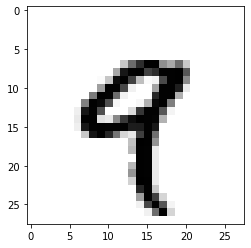

In [4]:
# Data representation - Displaying the fourth digit
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [5]:
# The network architecture
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [6]:
# The compilation step
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [7]:
# Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [8]:
# Preparing the labels - One hot encoding
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
# Train Network
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
  128/60000 [..............................] - ETA: 12:14

InternalError:  Blas GEMM launch failed : a.shape=(128, 784), b.shape=(784, 512), m=128, n=512, k=784
	 [[node sequential/dense/MatMul (defined at C:\Users\kashif\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_distributed_function_712]

Function call stack:
distributed_function


In [ ]:
# check that the model performs well on the test set, too
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

In [ ]:
# Perform prediction from model
network.predict(test_images[0:1])